In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Simulate some data
np.random.seed(0)
n = 100
p = 3
k = 2
data = pd.DataFrame({
    'Y1': np.random.randn(n),
    'Y2': np.random.randn(n),
    'X1': np.random.randn(n),
    'X2': np.random.randn(n),
    'X3': np.random.randn(n)
})

# Create lagged features for the covariates
for col in ['X1', 'X2', 'X3']:
    for lag in [1, 2, 3]:  # using 3 lags as an example
        data[f'{col}_lag{lag}'] = data[col].shift(lag)

# Drop any rows with NaN values created by lagging
data.dropna(inplace=True)

# Feature and target matrices
X = data.drop(['Y1', 'Y2'], axis=1)
Y = data[['Y1', 'Y2']]  # Multi-output target

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [4]:
data.head()

,Y1,Y2,X1,X2,X3,X1_lag1,X1_lag2,X1_lag3,X2_lag1,X2_lag2,X2_lag3,X3_lag1,X3_lag2,X3_lag3
3,2.240893,0.969397,0.655264,-0.680178,0.356293,1.099660,-0.239379,-0.369182,-0.118164,1.658131,-1.306527,0.766663,-1.115897,-0.598654
4,1.867558,-1.173123,0.640132,0.666383,-1.768538,0.655264,1.099660,-0.239379,-0.680178,-0.118164,1.658131,0.356293,0.766663,-1.115897
5,-0.977278,1.943621,-1.616956,-0.460720,0.355482,0.640132,0.655264,1.099660,0.666383,-0.680178,-0.118164,-1.768538,0.356293,0.766663
6,0.950088,-0.413619,-0.024326,-1.334258,0.814520,-1.616956,0.640132,0.655264,-0.460720,0.666383,-0.680178,0.355482,-1.768538,0.356293
7,-0.151357,-0.747455,-0.738031,-1.346718,0.058926,-0.024326,-1.616956,0.640132,-1.334258,-0.460720,0.666383,0.814520,0.355482,-1.768538


## RF

In [2]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
rf_predictions = rf.predict(X_test)
print("RF Predictions:", rf_predictions)


RF Predictions: [[ 0.28517717  0.69774035]
 [-0.15433903  0.28410493]
 [-0.2829732   0.11435891]
 [ 0.0238199   0.19851781]
 [-0.03616236  0.15398351]
 [ 0.15205553  0.21007378]
 [-0.19155764  0.42325867]
 [ 0.21705323  0.19851551]
 [ 0.18523271  0.49946059]
 [ 0.0430139  -0.04599992]
 [ 0.54876332 -0.27858527]
 [-0.26879903  0.24960543]
 [-0.55360699  0.24875082]
 [ 0.14818034  0.69943858]
 [-0.0668343  -0.17636869]
 [-0.12143787 -0.04463724]
 [-0.02362901  0.66280094]
 [-0.12241462  0.2606032 ]
 [-0.53976168 -0.01419742]
 [ 0.00173291  0.18143665]]


Random Forest calculates feature importance based on the average decrease in impurity (variance for regression, Gini for classification) contributed by each feature across all trees.

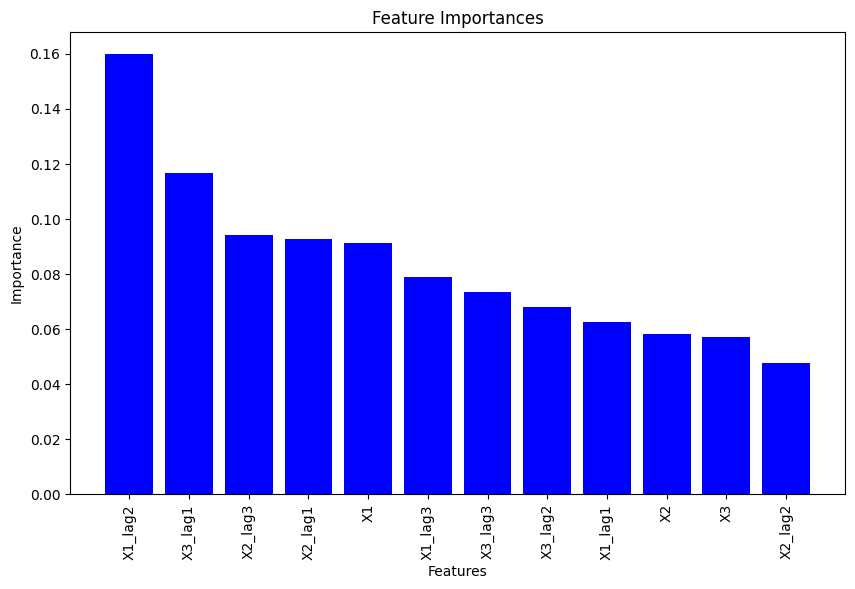

In [5]:
import matplotlib.pyplot as plt

# Assuming 'rf' is your trained RandomForestRegressor or RandomForestClassifier model
feature_importances = rf.feature_importances_

# To make it easier to interpret, put the feature importances into a DataFrame
features = X_train.columns
importances_df = pd.DataFrame(data={'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'], color='b')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation='vertical')
plt.show()


## XGB


In [3]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg.fit(X_train, Y_train)
xgb_predictions = xg_reg.predict(X_test)
print("XGBoost Predictions:", xgb_predictions)


XGBoost Predictions: [[ 0.5114359   0.35102448]
 [-0.04702122  0.11351112]
 [ 0.11513279 -0.8996354 ]
 [-0.3177196  -0.6295171 ]
 [ 0.03617882  0.4239108 ]
 [ 0.6952173   0.7546155 ]
 [-0.35745415  0.48292693]
 [ 0.22690894 -0.44744796]
 [ 0.27552256  0.36313158]
 [ 0.17069796 -0.16246465]
 [ 0.47939858 -0.9439867 ]
 [ 0.4683561  -0.15185614]
 [-0.98080945  0.60009736]
 [ 0.1251243   0.295535  ]
 [ 0.3155038   0.66225696]
 [ 0.2601858  -0.04444625]
 [ 0.00901979  0.9070892 ]
 [-0.38556823 -0.39978105]
 [-0.80060047  0.05336352]
 [ 0.5173666  -0.54337126]]


XGBoost provides several types of feature importance metrics, including weight, gain, and cover:

Weight: The number of times a feature is used to split the data across all trees.

Gain: The average gain of the feature when it is used in trees.

Cover: The average coverage of the feature when it is used in trees.

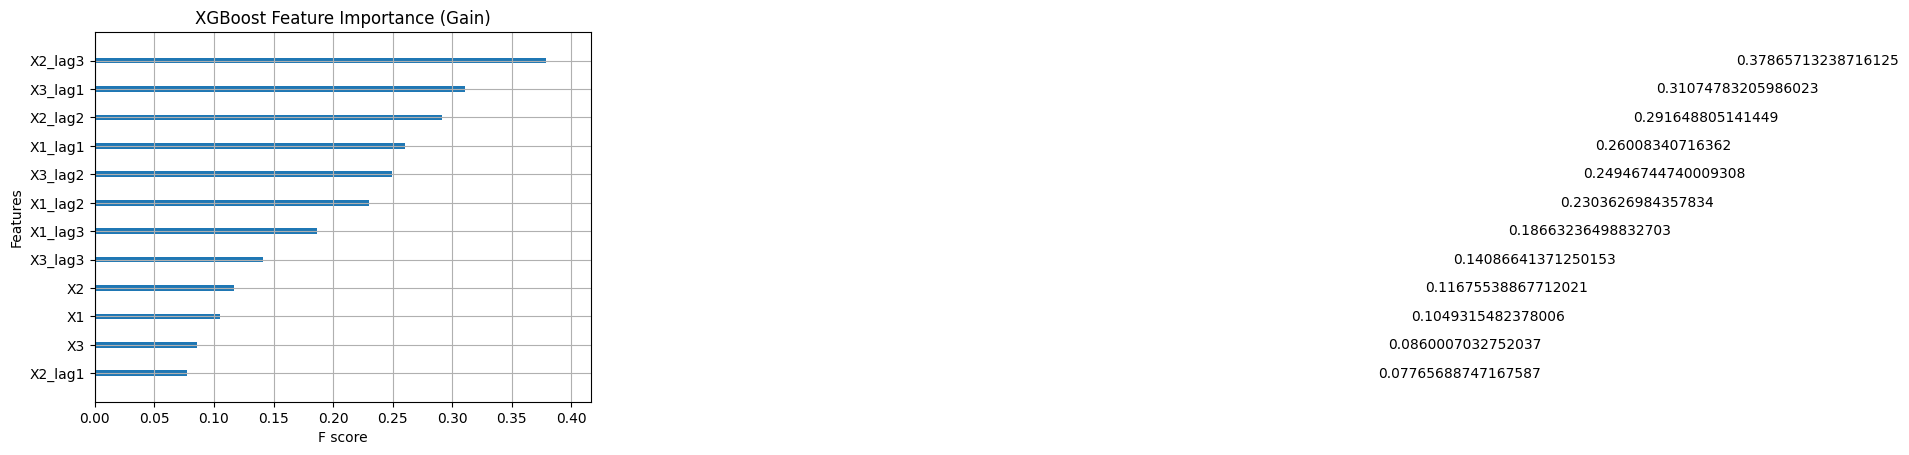

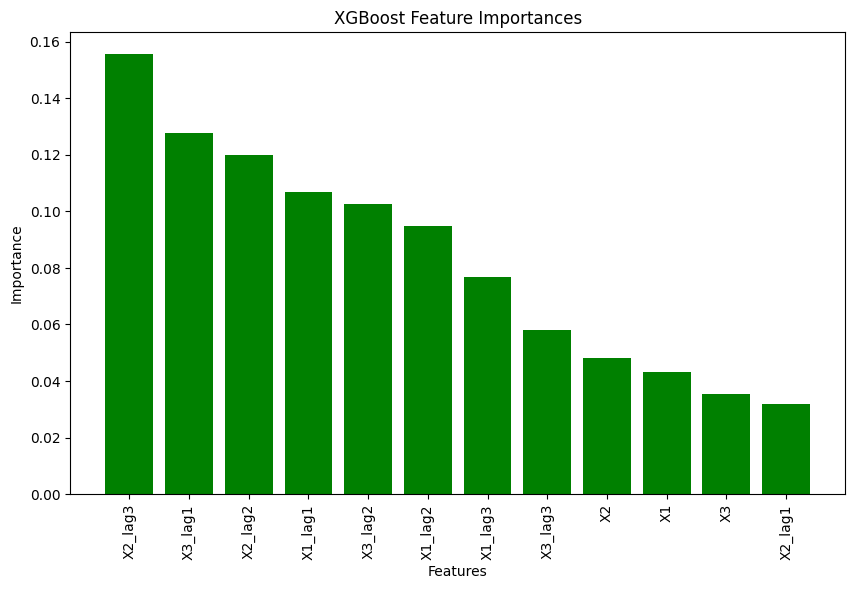

In [6]:
from xgboost import plot_importance

# Assuming 'xg_reg' is your trained XGBRegressor or XGBClassifier model
# You can access the feature importance for different importance types: 'weight', 'gain', 'cover'
xgb.plot_importance(xg_reg, importance_type='gain', title='XGBoost Feature Importance (Gain)')

# For a customized plot similar to the Random Forest example
feature_importances_xgb = xg_reg.feature_importances_  # This gives the importance based on 'weight' by default
importances_xgb_df = pd.DataFrame(data={'Feature': features, 'Importance': feature_importances_xgb})
importances_xgb_df = importances_xgb_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importances_xgb_df['Feature'], importances_xgb_df['Importance'], color='g')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.xticks(rotation='vertical')
plt.show()
